In [21]:
import numpy as np
import pdb
 
from sklearn.datasets import make_classification
from sklearn.mixture import GaussianMixture
import random
import cv2
import pickle
import matplotlib.pyplot as plt

In [22]:


def make_feature(idx, file, target_size = 300):
    if idx % 100 == 0:
        print(idx)
    img = cv2.imread(file.split('\n')[0], cv2.IMREAD_GRAYSCALE)
#     min_size = min(img.shape[:2])
#     scale_ratio = target_size/float(min_size)
    img = cv2.resize(img, (256, 256))
    #_ , descriptors = cv2.SIFT().detectAndCompute(img, None)
    sift = cv2.xfeatures2d.SIFT_create()
    _, descriptors = sift.detectAndCompute(img, None)
#        print(descriptors.shape)
    return descriptors

# Short demo.
K = 64
root_path = '../cropped_images/Category-Attribute-Prediction-Benchmark'
path = '../multi_label_list_50_greater_v1.txt'
f = open(path,'r')
lines = f.readlines()
f.close()

if 1:#not os.path.exists('./test.pkl'):
    label_info = {}
    for line in lines:
        data = line.split('\t')
        filename = data[0]
        label = data[2].split('\n')[0]
        if label in label_info:
            label_info[label].append(filename)
        else:
            label_info[label]=[filename]
    files = []
    for k in label_info:
        if k == '0':
            filename_list = label_info[k]
            for ff in filename_list:
                files.append( os.path.join(root_path, ff) )
    feature_list = [make_feature(idx, file) for idx, file in enumerate(files)]
    features = np.concatenate([v for v in feature_list if v != None])
    print(features.shape)
    print('gmm')
    gmm = GaussianMixture(n_components=K, covariance_type='diag')
    gmm.fit(features)
    print('fisher vector')
    with open('test.pkl','wb') as f:
        pickle.dump(gmm, f, pickle.HIGHEST_PROTOCOL)
else:
    with open('test.pkl','rb') as f:
        gmm = pickle.load(f)


0
100
200


/home/scom/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:41: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


(105055, 128)
gmm
fisher vector


In [23]:
def fisher_vector(xx, gmm):
    """Computes the Fisher vector on a set of descriptors.
 
    Parameters
    ----------
    xx: array_like, shape (N, D) or (D, )
        The set of descriptors
 
    gmm: instance of sklearn mixture.GMM object
        Gauassian mixture model of the descriptors.
 
    Returns
    -------
    fv: array_like, shape (K + 2 * D * K, )
        Fisher vector (derivatives with respect to the mixing weights, means
        and variances) of the given descriptors.
 
    Reference
    ---------
    J. Krapac, J. Verbeek, F. Jurie.  Modeling Spatial Layout with Fisher
    Vectors for Image Categorization.  In ICCV, 2011.
    http://hal.inria.fr/docs/00/61/94/03/PDF/final.r1.pdf
 
    """
    xx = np.atleast_2d(xx)
    N = xx.shape[0]
 
    # Compute posterior probabilities.
    Q = gmm.predict_proba(xx)  # NxK
 
    # Compute the sufficient statistics of descriptors.
    Q_sum = np.sum(Q, 0)[:, np.newaxis] / N
    Q_xx = np.dot(Q.T, xx) / N
    Q_xx_2 = np.dot(Q.T, xx ** 2) / N
 
    # Compute derivatives with respect to mixing weights, means and variances.
    d_pi = Q_sum.squeeze() - gmm.weights_
    d_mu = Q_xx - Q_sum * gmm.means_
    d_sigma = (
        - Q_xx_2
        - Q_sum * gmm.means_ ** 2
        + Q_sum * gmm.covariances_
        + 2 * Q_xx * gmm.means_)
 
    # Merge derivatives into a vector.
    return np.hstack((d_pi, d_mu.flatten(), d_sigma.flatten()))

In [24]:
zero_label = []
for line in lines:
    data = line.split('\t')
    filename = data[0]
    label = data[2].split('\n')[0]
    if label == '0':
        zero_label.append(os.path.join(root_path,filename))
print(len(zero_label))
file_feature = {}
for idx, file in enumerate(zero_label):
    feature = make_feature(idx, file)
    if feature != None:
        file_feature[file]=fisher_vector(feature, gmm)

278
0


/home/scom/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sys.path[0] == '':


100
200


/home/scom/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


(1, 277)


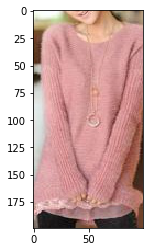

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Fuzzy_Knit_Sweater/img_00000005.jpg
(199, 100, 3)


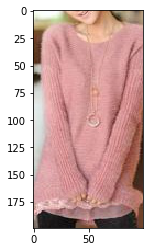

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Eyelash_Knit_Ball_Sweater/img_00000004.jpg
(179, 164, 3)


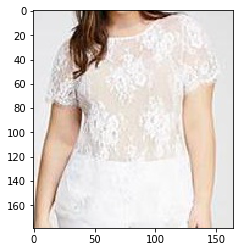

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Tasseled_Lace-Up_Sweater/img_00000034.jpg
(134, 128, 3)


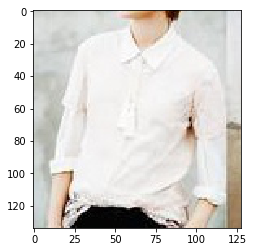

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Boxy_Slub_Knit_Sweater/img_00000006.jpg
(179, 139, 3)


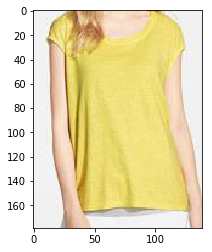

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Lace-Paneled_Sweater/img_00000041.jpg
(169, 136, 3)


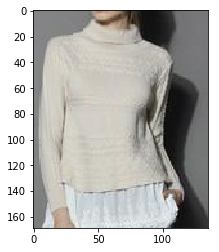

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Crochet_Lace-Trimmed_Sweater/img_00000001.jpg
(186, 158, 3)


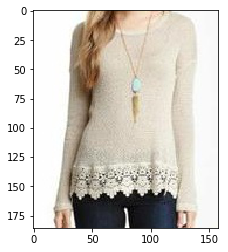

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Crochet_Lace-Trimmed_Sweater/img_00000011.jpg
(166, 152, 3)


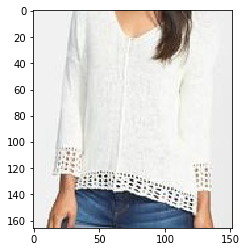

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Faux_Fur_&_Knit_Sweater/img_00000040.jpg
(242, 160, 3)


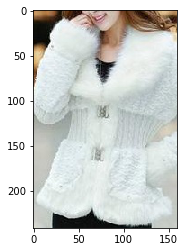

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Layered-Collar_Sweater/img_00000042.jpg
(165, 154, 3)


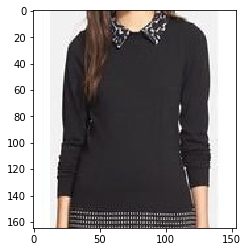

../cropped_images/Category-Attribute-Prediction-Benchmark/img/Crochet_Lace-Trimmed_Sweater/img_00000024.jpg
(189, 121, 3)


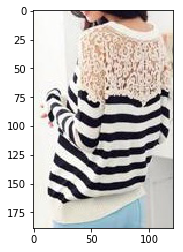

In [31]:


vectors = np.zeros((len(file_feature),65792), dtype=np.float32)
file_names = []
for idx, k in enumerate(file_feature):
    vectors[idx]=file_feature[k]
    file_names.append(k)
from sklearn.metrics.pairwise import cosine_similarity
q_vector = vectors[0]
score = cosine_similarity(q_vector, vectors)
print(score.shape)
ind_score = np.argsort(score[0])[::-1]
# print(ind_score.shape)
# print(ind_score[2])
# print(score[0,ind_score[2]])
im = cv2.imread(file_names[0])
# print(file_names[0])
# print(im.shape)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()
for select_score_ind in range(10):
    im = cv2.imread(file_names[ind_score[select_score_ind]])
    print(file_names[ind_score[select_score_ind]])
    print(im.shape)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.show()
#     print(file_feature[k].shape)

In [ ]:
fv = fisher_vector(features, gmm)
pdb.set_trace()